In [ ]:

import os

from tqdm import tqdm

import itertools
import warnings
warnings.filterwarnings('ignore')

from matplotlib import gridspec
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from matplotlib import cm
import matplotlib.ticker as mtick

import datetime
from scipy import stats
from scipy.stats import pearsonr
import statsmodels.api as sm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')#, force_remount=True)

Mounted at /content/gdrive


In [ ]:
results_path = '/content/gdrive/MyDrive/Research - PhD/Results/Resettlements/trend stats/'
files = os.listdir(results_path)
files

['Leyte_stats.csv',
 'Cebu_stats.csv',
 'Samar_stats.csv',
 'Biliran_stats.csv',
 'Aklan_stats.csv',
 'Antique_stats.csv',
 'Misamis Oriental_stats.csv',
 'Lanao Del Norte_stats.csv',
 'Albay_stats.csv',
 'Laguna_stats.csv',
 'Davao Oriental_stats.csv',
 'Bulacan_stats.csv',
 'Rizal_stats.csv',
 'Benguet_stats.csv']

In [ ]:
regions = []
dataframes = []
for f in tqdm(files[:-1]):
  regions.append(f[:-10])
  dataframes.append(pd.read_csv(results_path+f, index_col = 0).reset_index(drop=True))
# regions
# dataframes

100%|██████████| 13/13 [00:00<00:00, 146.80it/s]


In [ ]:
for prov_stats in files:
  prov_DF = pd.read_csv(results_path+prov_stats, index_col = 0)

In [ ]:
resettlement_stats = pd.concat(dataframes, ignore_index=False, axis = 1, keys = regions)
summary = resettlement_stats[:2].copy()
summary.loc[2] = resettlement_stats[2:].mean()
summary = summary.set_axis(['Provincial Baseline', 'Regional Baseline', 'Resettlement Sites'])
summary = summary.stack(level=1).T
summary

Provincial Baseline                                    \
                               slope intercept         r             p   
Leyte                       0.003194  0.169942  0.894244  2.152574e-37   
Cebu                        0.003472  0.904763  0.837511  1.583258e-28   
Samar                       0.003145  0.134389  0.925534  8.155966e-45   
Biliran                     0.003221  0.079897  0.907163  3.904522e-40   
Aklan                       0.003117  0.116262  0.929764  4.599180e-46   
Antique                     0.003289  0.089185  0.934799  1.176777e-47   
Misamis Oriental            0.002208  0.482141  0.711526  2.560848e-17   
Lanao Del Norte             0.002655  0.154518  0.868695  6.873630e-33   
Albay                       0.004236  0.164879  0.950933  8.921832e-54   
Laguna                      0.005859  1.695702  0.937009  2.144572e-48   
Davao Oriental              0.002863  0.025690  0.930062  3.731535e-46   
Bulacan                     0.008633  0.744919  0.960635  1.500657e-58   
Rizal                       0.007324  1.129093  0.979273  1.480208e-72   

                           Regional Baseline                      \
                       std             slope intercept         r   
Leyte             0.000158          0.003042  0.066934  0.903144   
Cebu              0.000224          0.003023  0.388491  0.879574   
Samar             0.000127          0.003042  0.066934  0.903144   
Biliran           0.000148          0.003042  0.066934  0.903144   
Aklan             0.000122          0.003435  0.183316  0.937096   
Antique           0.000124          0.003435  0.183316  0.937096   
Misamis Oriental  0.000216          0.002588  0.171080  0.857819   
Lanao Del Norte   0.000150          0.002588  0.171080  0.857819   
Albay             0.000136          0.003685  0.079190  0.944563   
Laguna            0.000216          0.005495  0.730081  0.976447   
Davao Oriental    0.000112          0.003026  0.223290  0.909818   
Bulacan           0.000247          0.004814  0.432946  0.963351   
Rizal             0.000150          0.005495  0.730081  0.976447   

                                         Resettlement Sites            \
                             p       std              slope intercept   
Leyte             3.056949e-39  0.000143           0.001923  0.180941   
Cebu              1.108644e-34  0.000162           0.001501  0.190777   
Samar             3.056949e-39  0.000143           0.002239  0.175359   
Biliran           3.056949e-39  0.000143           0.001514  0.184799   
Aklan             2.001929e-48  0.000127           0.002125  0.162586   
Antique           2.001929e-48  0.000127           0.002062  0.155102   
Misamis Oriental  2.990913e-31  0.000154           0.001448  0.209410   
Lanao Del Norte   2.990913e-31  0.000154           0.001597  0.182596   
Albay             3.841751e-51  0.000127           0.001314  0.209550   
Laguna            9.354691e-70  0.000120           0.002978  0.144003   
Davao Oriental    9.515165e-41  0.000137           0.001133  0.190768   
Bulacan           4.193637e-60  0.000133           0.003054  0.163693   
Rizal             9.354691e-70  0.000120           0.003193  0.148126   

                                                    
                         r             p       std  
Leyte             0.500383  4.998536e-03  0.000317  
Cebu              0.518206  1.771625e-03  0.000234  
Samar             0.552659  4.962984e-05  0.000327  
Biliran           0.405362  9.952082e-02  0.000264  
Aklan             0.671214  5.724550e-07  0.000227  
Antique           0.776461  3.565078e-06  0.000162  
Misamis Oriental  0.466232  4.690504e-03  0.000256  
Lanao Del Norte   0.525152  1.135896e-03  0.000248  
Albay             0.512014  1.275147e-03  0.000216  
Laguna            0.791032  2.469620e-20  0.000226  
Davao Oriental    0.400019  4.840566e-02  0.000232  
Bulacan           0.837119  6.686781e-28  0.000198  
Rizal             0.852502  7.930055e-26  0.000

# NTL Trend Analysis

In [ ]:
path = '/content/gdrive/MyDrive/Research - PhD/Results/Resettlements/'
# summary.to_csv(path + 'NTL_Resettlement_Summary.csv')

In [ ]:
data = resettlement_stats.xs('slope', level=1, axis=1)
ROC_annual = data*117/12
# ROC_annual

In [ ]:
index_sort = ROC_annual[2:].mean().sort_values(ascending = False).index
ROC_sorted = ROC_annual[index_sort]
ROC_sorted

Rizal   Bulacan    Laguna     Samar     Aklan   Antique     Leyte  \
0   0.071406  0.084169  0.057128  0.030665  0.030387  0.032065  0.031144   
1   0.053573  0.046934  0.053573  0.029661  0.033491  0.033491  0.029661   
2   0.027805  0.028426  0.024880  0.026375  0.021511  0.021868  0.020197   
3   0.034449  0.025781  0.030889  0.023072  0.019471  0.022441  0.018977   
4        NaN  0.033378  0.028451  0.023722  0.019997  0.018193  0.016756   
5        NaN  0.031510  0.031921  0.010728  0.025973  0.018660  0.016789   
6        NaN       NaN       NaN  0.017374  0.019801  0.021232  0.016859   
7        NaN       NaN       NaN  0.023500  0.018644  0.018959  0.018897   
8        NaN       NaN       NaN  0.032725  0.030755  0.019947  0.022181   
9        NaN       NaN       NaN  0.012767  0.029660  0.018925  0.017512   
10       NaN       NaN       NaN  0.015333  0.017431  0.019488  0.022836   
11       NaN       NaN       NaN  0.023391  0.016295  0.022607  0.020655   
12       NaN       NaN       NaN  0.028766  0.013874  0.021864  0.015292   
13       NaN       NaN       NaN  0.016493  0.015209  0.022397  0.024064   
14       NaN       NaN       NaN  0.019428       NaN  0.020173  0.024140   
15       NaN       NaN       NaN  0.023351       NaN  0.023191  0.021841   
16       NaN       NaN       NaN  0.028512       NaN  0.023806  0.015136   
17       NaN       NaN       NaN  0.019289       NaN  0.024644  0.026533   
18       NaN       NaN       NaN  0.027761       NaN  0.023191  0.019266   
19       NaN       NaN       NaN  0.019005       NaN  0.020901  0.024864   
20       NaN       NaN       NaN  0.023161       NaN  0.020323  0.023016   
21       NaN       NaN       NaN       NaN       NaN  0.008816  0.025326   
22       NaN       NaN       NaN       NaN       NaN  0.020473  0.024853   
23       NaN       NaN       NaN       NaN       NaN  0.016543  0.017787   
24       NaN       NaN       NaN       NaN       NaN  0.019624  0.025718   
25       NaN       NaN       NaN       NaN       NaN  0.018011  0.023863   
26       NaN       NaN       NaN       NaN       NaN  0.020667  0.009849   
27       NaN       NaN       NaN       NaN       NaN  0.015668  0.020517   
28       NaN       NaN       NaN       NaN       NaN       NaN  0.004634   
29       NaN       NaN       NaN       NaN       NaN       NaN  0.016065   
30       NaN       NaN       NaN       NaN       NaN       NaN  0.008962   
31       NaN       NaN       NaN       NaN       NaN       NaN  0.010374   
32       NaN       NaN       NaN       NaN       NaN       NaN  0.018661   
33       NaN       NaN       NaN       NaN       NaN       NaN  0.015894   
34       NaN       NaN       NaN       NaN       NaN       NaN  0.021197   
35       NaN       NaN       NaN       NaN       NaN       NaN  0.003643   
36       NaN       NaN       NaN       NaN       NaN       NaN  0.027670   
37       NaN       NaN       NaN       NaN       NaN       NaN  0.019327   
38       NaN       NaN       NaN       NaN       NaN       NaN  0.024980   
39       NaN       NaN       NaN       NaN       NaN       NaN  0.007500   

    Lanao Del Norte   Biliran      Cebu  Misamis Oriental     Albay  \
0          0.025885  0.031403  0.033849          0.021526  0.041304   
1          0.025232  0.029661  0.029476          0.025232  0.035924   
2          0.019997  0.033303  0.012469          0.027386  0.007331   
3          0.006324  0.025542  0.005342          0.025217  0.010968   
4          0.011037  0.002413  0.005723          0.007345  0.006920   
5          0.012467  0.012732  0.012173          0.017065  0.006839   
6          0.015980  0.009519  0.010120          0.014519  0.014367   
7          0.021121  0.007311  0.015940          0.015209  0.008716   
8          0.022099  0.002217  0.016349          0.017913  0.012517   
9               NaN -0.001387  0.004137          0.013867  0.014498   
10              NaN  0.003601  0.013574          0.011755  0.021748   
11              NaN  0.019287  0.01420

In [218]:
index_sort

Index(['Rizal', 'Bulacan', 'Laguna', 'Samar', 'Aklan', 'Antique', 'Leyte',
       'Lanao Del Norte', 'Biliran', 'Cebu', 'Misamis Oriental', 'Albay',
       'Davao Oriental'],
      dtype='object')

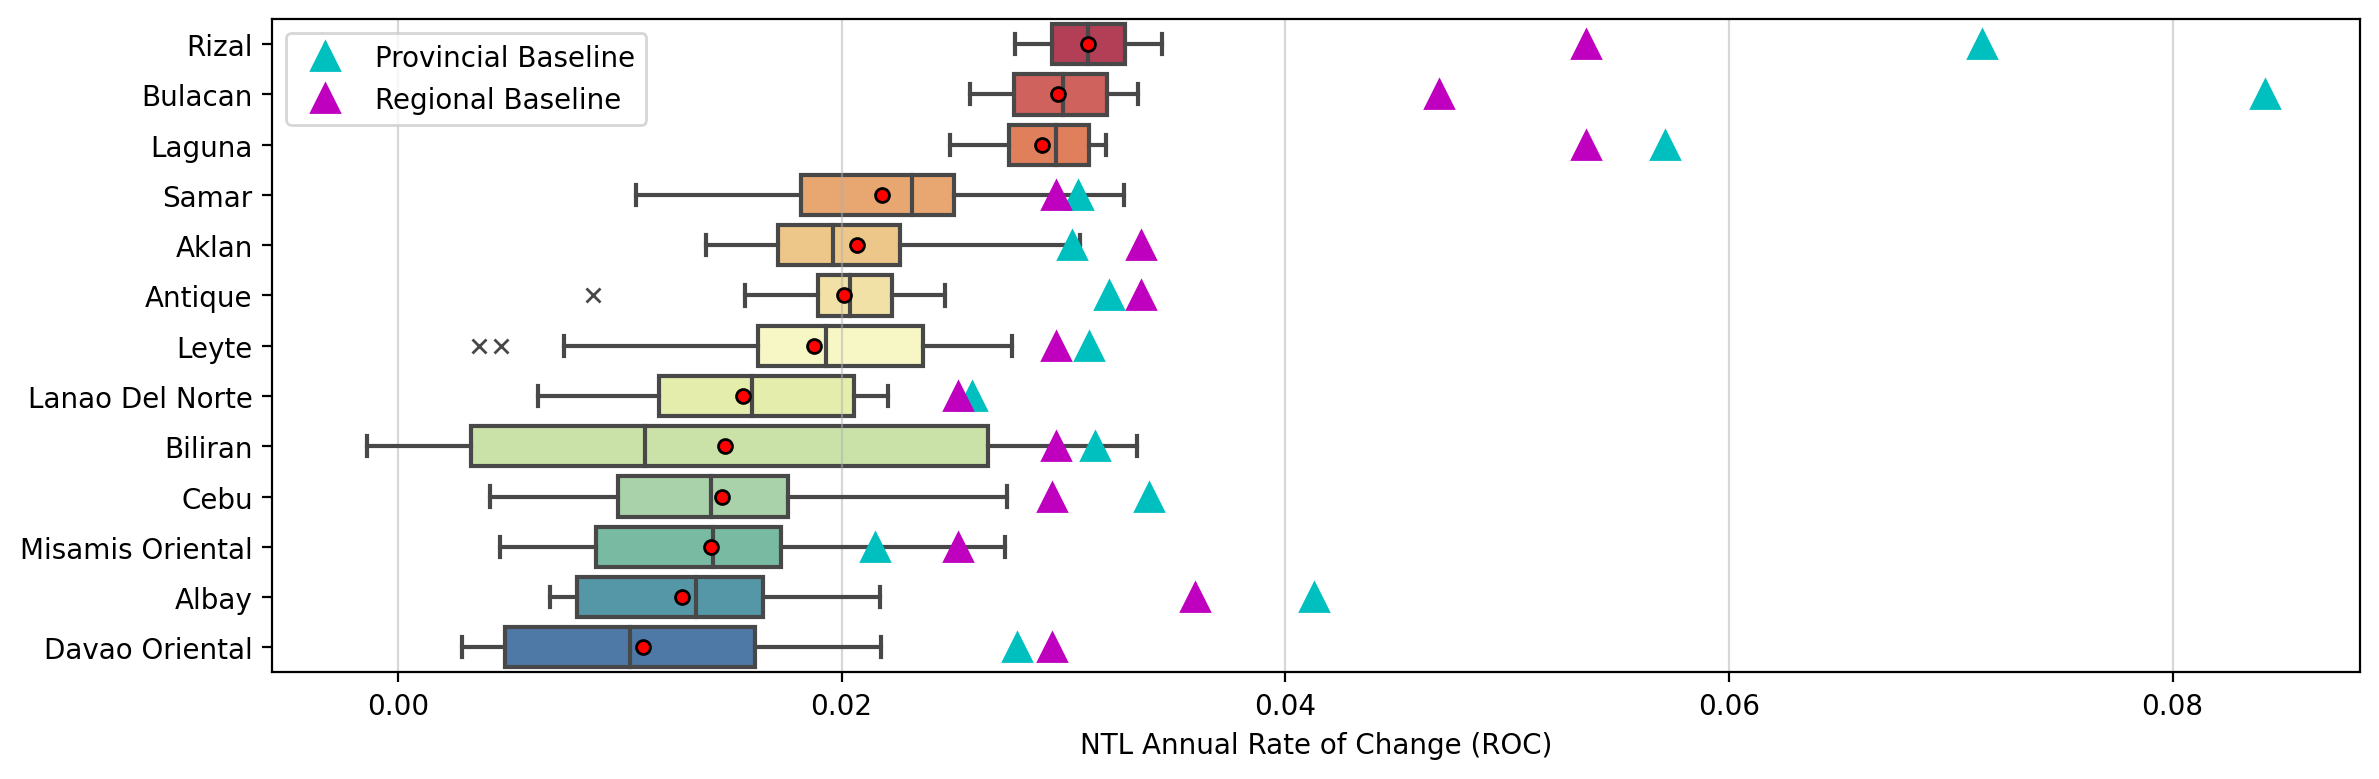

In [ ]:
fig = plt.figure(figsize = (12,4), dpi = 200)
# plt.rcParams.update({
#     "lines.color": "white",
#     "patch.edgecolor": "white",
#     "text.color": "black",
#     "axes.facecolor": "white",
#     "axes.edgecolor": "lightgray",
#     "axes.labelcolor": "white",
#     "xtick.color": "white",
#     "ytick.color": "white",
#     "grid.color": "lightgray",
#     "figure.facecolor": "black",
#     "figure.edgecolor": "black",
#     "savefig.facecolor": "black",
#     "savefig.edgecolor": "black"})
# fig.patch.set_facecolor('white')
# fig.patch.set_alpha(0)

plt.grid(alpha = 0.5)
sns.boxplot(ROC_sorted[2:], palette="Spectral", orient = 'h',
                flierprops={"marker": "x"}, meanprops={"markerfacecolor": "r",
                                                       "markeredgecolor": "k",
                                                       "marker": "o",
                                                       "markersize": 5}, showmeans=True)
# sns.swarmplot(ROC_sorted[2:], palette = 'gnuplot2', orient = 'h', alpha = 0.3, size = 4)
# for i in range(len(data.columns)):
#     plt.plot([0,len(data.columns)], [0, data_sorted[2:].median()[i]], color = plt.cm.Spectral(i/len(data.columns)))

plt.plot(ROC_sorted[0:1].values.T, np.arange(len(data.columns)), 'c^', label = 'Provincial Baseline', ms = 10)
plt.plot(ROC_sorted[1:2].values.T, np.arange(len(data.columns)), 'm^', label = 'Regional Baseline', ms = 10)
# plt.title('NTL rate of change of post-disaster resettlement sites in the Philippines (2014-2022)')
# plt.ylabel("Resettlement Sites")
# plt.xscale('log')
plt.xlabel("NTL Annual Rate of Change (ROC)")
plt.legend()
plt.tight_layout()
# plt.savefig(path + "NTL_ROC.png")

In [ ]:
results_path = '/content/gdrive/MyDrive/Research - PhD/Results/Resettlements/NTL STL/'
df_files = os.listdir(results_path)
df_files

['Rizal_df.csv',
 'Leyte_df.csv',
 'Cebu_df.csv',
 'Samar_df.csv',
 'Biliran_df.csv',
 'Aklan_df.csv',
 'Antique_df.csv',
 'Misamis Oriental_df.csv',
 'Lanao Del Norte_df.csv',
 'Albay_df.csv',
 'Laguna_df.csv',
 'Davao Oriental_df.csv',
 'Bulacan_df.csv',
 'Iloilo_df.csv',
 'Negros Occidental_df.csv']

In [ ]:
df = pd.read_csv(results_path + 'Leyte_df.csv', header=[0,1], index_col=0)
a = df.columns.get_level_values(0).to_series()
b = a.mask(a.str.startswith('Unnamed')).ffill().fillna('')
df.columns = [b, df.columns.get_level_values(1)]
df.index = pd.to_datetime(df.index)
df

Raw                                        \
           Leyte Province Region VIII Kawayan Ville Villa Diana   
date                                                              
2014-01-01       0.101630    0.087372      0.262384    0.225237   
2014-02-01       0.170149    0.114812      0.111189    0.107876   
2014-03-01       0.138900    0.098264      0.059881    0.080907   
2014-04-01       0.217183    0.181112      0.090566    0.053938   
2014-05-01       0.172025    0.111598      0.121251    0.026969   
...                   ...         ...           ...         ...   
2023-05-01       0.701959    0.529153      0.648243    0.811948   
2023-06-01       0.618948    0.461296      0.000000    0.000000   
2023-07-01       0.148886    0.147419      1.413277    1.359351   
2023-08-01       0.458526    0.387465      0.387297    0.435325   
2023-09-01       0.587854    0.433991      0.370541    0.110000   

                                                                     \
           Ridge View Park New Hope Village Knightsridge Residences   
date                                                                  
2014-01-01        0.240081         0.259939                0.250861   
2014-02-01        0.143410         0.163447                0.108903   
2014-03-01        0.007060         0.065777                0.054506   
2014-04-01        0.099713         0.043851                0.078866   
2014-05-01        0.047443         0.021926                0.066565   
...                    ...              ...                     ...   
2023-05-01        0.591814         0.431255                0.643906   
2023-06-01        0.000000         0.000000                0.000000   
2023-07-01        1.327103         1.486052                1.391000   
2023-08-01        0.426902         0.581734                0.462375   
2023-09-01        0.237657         0.380923                0.214219   

                                                             ...  \
           Villa Sofia North Hill Arbours Salvacion Heights  ...   
date                                                         ...   
2014-01-01    0.207366           0.278039          0.290849  ...   
2014-02-01    0.098870           0.126072          0.084186  ...   
2014-03-01    0.092130           0.044625          0.062283  ...   
2014-04-01    0.064774           0.029750          0.394358  ...   
2014-05-01    0.032387           0.014875          0.102708  ...   
...                ...                ...               ...  ...   
2023-05-01    0.574933           0.732504          0.581307  ...   
2023-06-01    0.000000           0.000000          0.000000  ...   
2023-07-01    1.296726           1.438504          1.409091  ...   
2023-08-01    0.452197           0.566908          0.407273  ...   
2023-09-01    0.328789           0.330571          0.257216  ...   

                Residual                                           \
           Villa Soledad Virlyn Heights Subdivision Tabango Ville   
date                                                                
2014-01-01           NaN                        NaN           NaN   
2014-02-01           NaN                        NaN           NaN   
2014-03-01           NaN                        NaN           NaN   
2014-04-01           NaN                        NaN           NaN   
2014-05-01           NaN                        NaN           NaN   
...                  ...                        ...           ...   
2023-05-01           NaN                        NaN           NaN   
2023-06-01           NaN                        NaN           NaN   
2023-07-01           NaN                        NaN           NaN   
2023-08-01           NaN                        NaN           NaN   
2023-09-01           NaN                        NaN           NaN   

                                                                             \
           Dulag Town Ville Barugo Town Ville  Villa Verde Capoocan Village   
date      

# NTL Interpolation

In [ ]:
dataframes = []
provincial_df = []
for NTL_DF in tqdm(df_files):
  df = pd.read_csv(results_path + NTL_DF, header=[0,1], index_col=0)
  a = df.columns.get_level_values(0).to_series()
  b = a.mask(a.str.startswith('Unnamed')).ffill().fillna('')
  df.columns = [b, df.columns.get_level_values(1)]
  df.index = pd.to_datetime(df.index)
  dataframes.append(df)
  provincial_df.append(str(NTL_DF[:-7]))

# dataframes, provincial_df

100%|██████████| 15/15 [00:03<00:00,  3.82it/s]


In [ ]:
provincial_df

['Rizal',
 'Leyte',
 'Cebu',
 'Samar',
 'Biliran',
 'Aklan',
 'Antique',
 'Misamis Oriental',
 'Lanao Del Norte',
 'Albay',
 'Laguna',
 'Davao Oriental',
 'Bulacan',
 'Iloilo',
 'Negros Occidental']

In [ ]:
import statsmodels.api as sm

def STL_extraction(NTL_dataset, period):
    trend = NTL_dataset.copy()
    seasonality = NTL_dataset.copy()
    residual = NTL_dataset.copy()

    for loc in tqdm(NTL_dataset.columns, desc = 'STL Decomposition'):
      data = NTL_dataset[loc].values
      decomposition = sm.tsa.seasonal_decompose(data, model='additive', period = period)
      trend[loc] = decomposition.trend
      seasonality[loc] = decomposition.seasonal
      residual[loc] = decomposition.resid

    dataframe = pd.concat([NTL_dataset,trend, seasonality, residual], axis = 1, keys = ['Raw', 'Trend', 'Seasonality', 'Residual'])
    return dataframe

In [ ]:
dataframe = STL_extraction(dataframes[1]['Raw'], period = 12)

STL Decomposition: 100%|██████████| 40/40 [00:00<00:00, 223.84it/s]


In [ ]:
def plot_STL(dataframe):
    print("Plotting timeseries NTL data")

    fig, ax = plt.subplots(nrows=4,ncols=1, sharex='col',
                      gridspec_kw={'height_ratios':[0.75,2,0.75,0.5]},
                      figsize=(12,6), dpi = 200)

    date = dataframe.index

    trend = dataframe['Trend']
    seasonality = dataframe['Seasonality']
    residual = dataframe['Residual']

    province = dataframe['Raw'].columns[0]
    region = dataframe['Raw'].columns[1]

    NTL_dataset = dataframe['Raw']
    prov_df = NTL_dataset.iloc[:, 2:]
    sites = prov_df.columns

    ax[0].plot(NTL_dataset.iloc[:,0], 'b.-', drawstyle = 'steps-mid',  linewidth = 3, alpha = 0.5)
    ax[0].plot(NTL_dataset.iloc[:,1], 'k.-', drawstyle = 'steps-mid', linewidth = 2, alpha = 0.5)

    ax[1].plot(trend.iloc[:,0], 'b.-', drawstyle = 'steps-mid', label= str(province) + ' Province',  linewidth = 3, alpha = 0.8)
    ax[1].plot(trend.iloc[:,1], 'k.-', drawstyle = 'steps-mid', label= str(region), linewidth = 2, alpha = 0.8)
    ax[2].plot(seasonality.iloc[:,0], 'b-', drawstyle = 'steps-mid',  linewidth = 1.5, alpha = 0.8)
    ax[2].plot(seasonality.iloc[:,1], 'k-', drawstyle = 'steps-mid', linewidth = 1, alpha = 0.8)
    ax[3].bar(date, residual.iloc[:,0], color = 'b',  width = 15, alpha = 0.8)
    ax[3].bar(date, residual.iloc[:,1], color = 'k', width = 12,  alpha = 0.8)

    for i in tqdm(range(len(sites)), desc = 'Processing: '):

      data = NTL_dataset.iloc[:,i+2].values
      line_color = plt.cm.Spectral(i/len(sites))

      ax[0].plot(date, data, color = line_color, linewidth = 1, alpha = 0.8)
      ax[0].set_ylabel('$nW ·cm^{−2}·sr^{−1}$')

      ax[1].plot(date, trend.iloc[:,i+2], color = line_color,
                linewidth = 2, alpha = 0.8, label= NTL_dataset.columns[i+2])
      ax[1].set_ylabel('trend')

      ax[2].plot(date, seasonality.iloc[:,i+2], color = line_color,
                linewidth = 1, alpha = 0.6)
      ax[2].set_ylabel('seasonality')

      resid = residual.iloc[:,i+2]
      ax[3].bar(date, resid, width = 10, color = line_color, alpha = 0.8)
      ax[3].set_ylabel('residual')


    ax[1].legend(fontsize=8, ncol = 5, bbox_to_anchor= (0, 1.05, 1, 0.5), loc="lower left",
                bbox_transform=ax[0].transAxes, fancybox = True, mode='expand')

    for ax in ax:
      ax.grid(alpha = 0.5)
      ax.axvline(datetime.date(2020, 3, 10), color = 'r', lw = 5, alpha = 0.2) #For COVID lockdown
      ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f')) # 2 decimal places)
      ax.minorticks_on()
      ax.xaxis.grid(True, which='minor', alpha = 0.2)


    dtFmt = mdates.DateFormatter('%b-%Y') # define the formatting
    plt.gca().xaxis.set_major_formatter(dtFmt) # apply the format to the desired axis
    # plt.tight_layout()
   # plt.savefig(results+"/CH6-TS-"+str(province)+".png", bbox_inches="tight")
    plt.show()

Plotting timeseries NTL data


Processing: 100%|██████████| 38/38 [00:05<00:00,  6.48it/s]


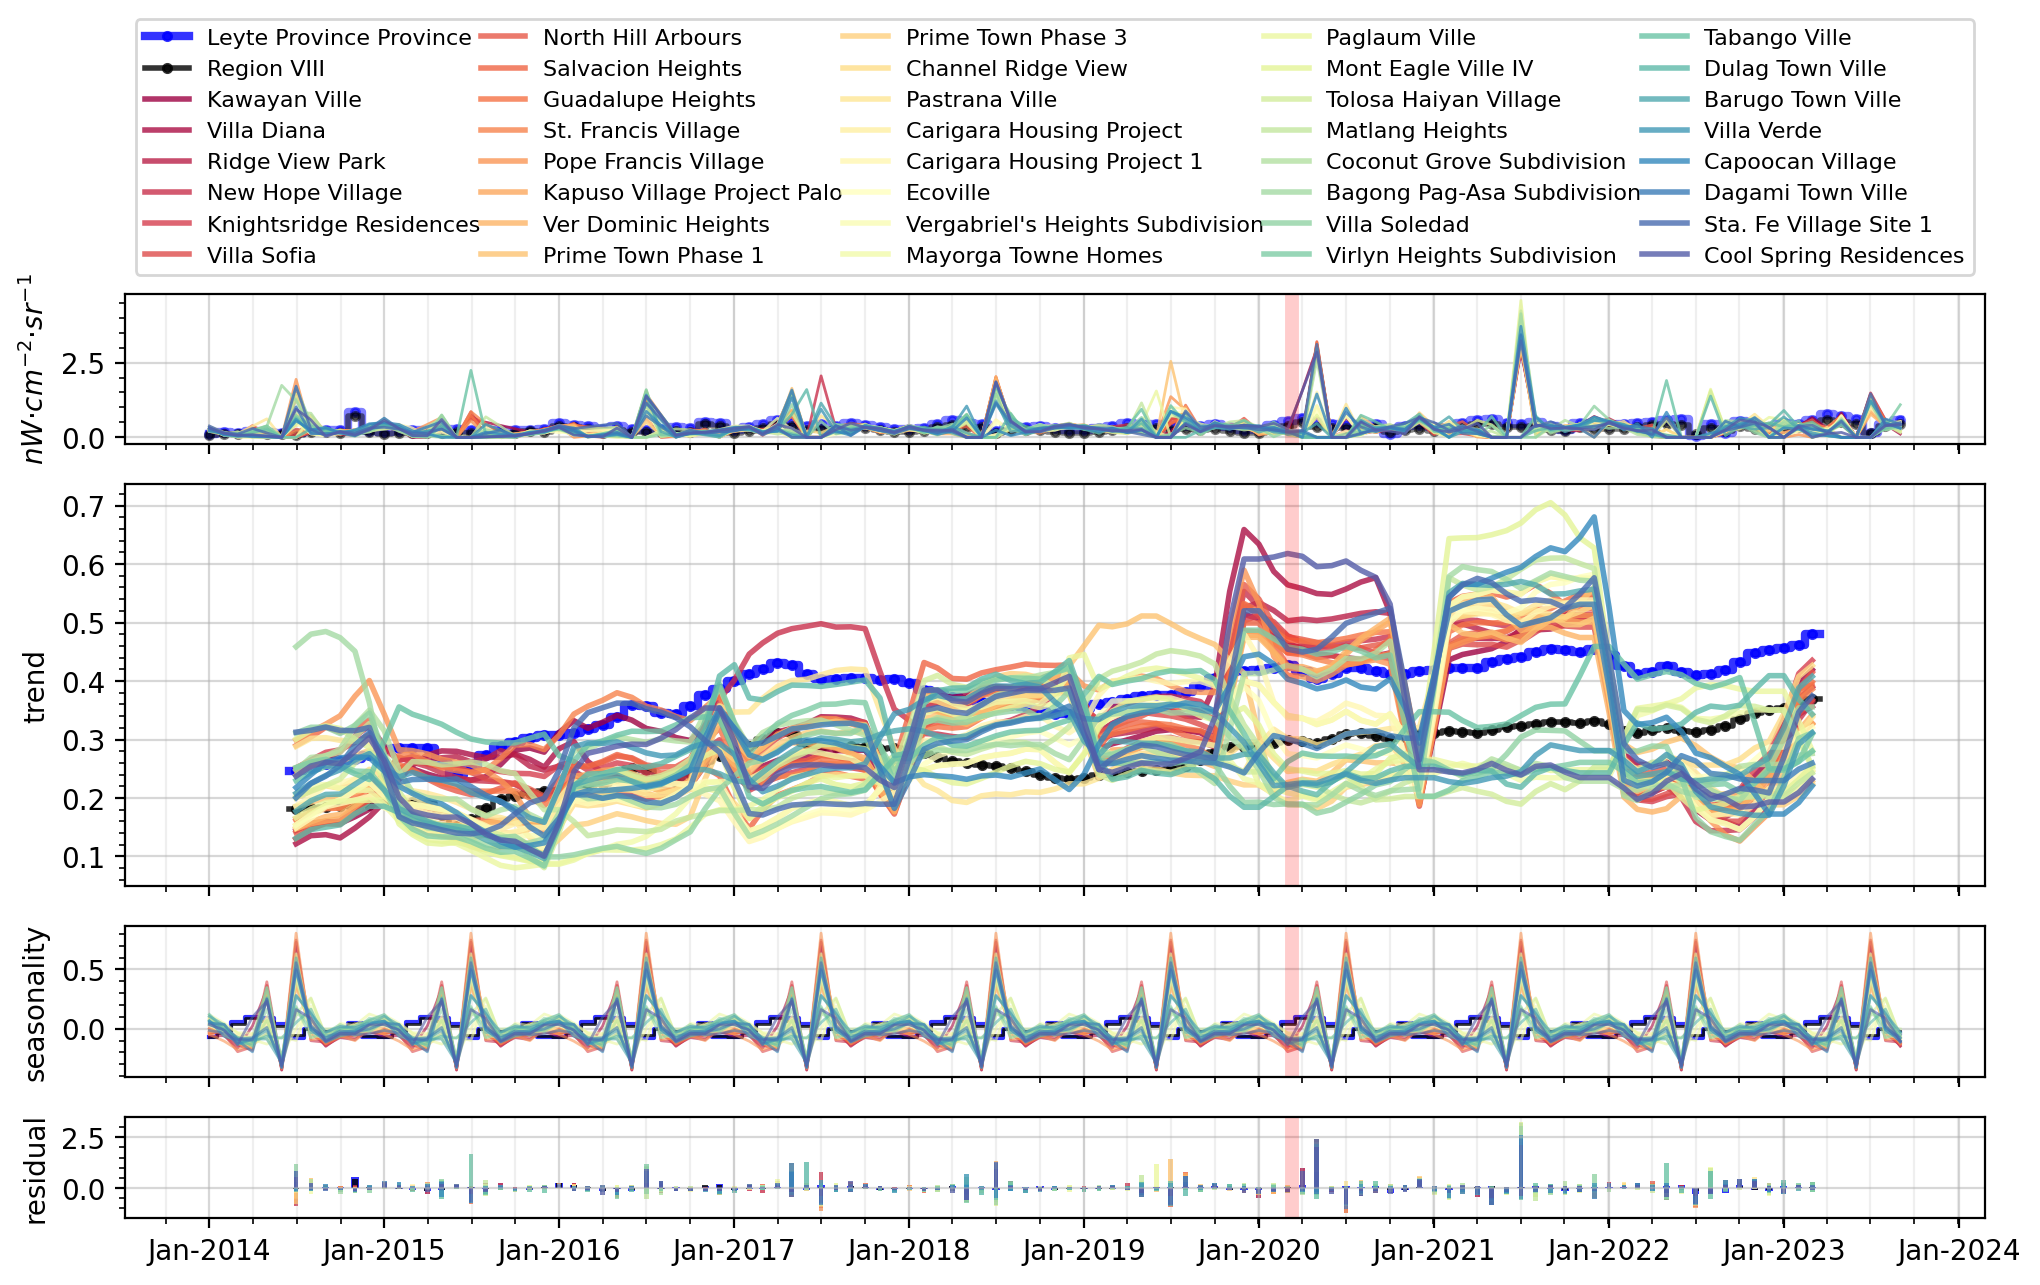

In [ ]:
plot_STL(dataframe)

## Linear Interpolation

STL Decomposition: 100%|██████████| 40/40 [00:00<00:00, 64.43it/s]


Plotting timeseries NTL data


Processing: 100%|██████████| 38/38 [00:08<00:00,  4.60it/s]


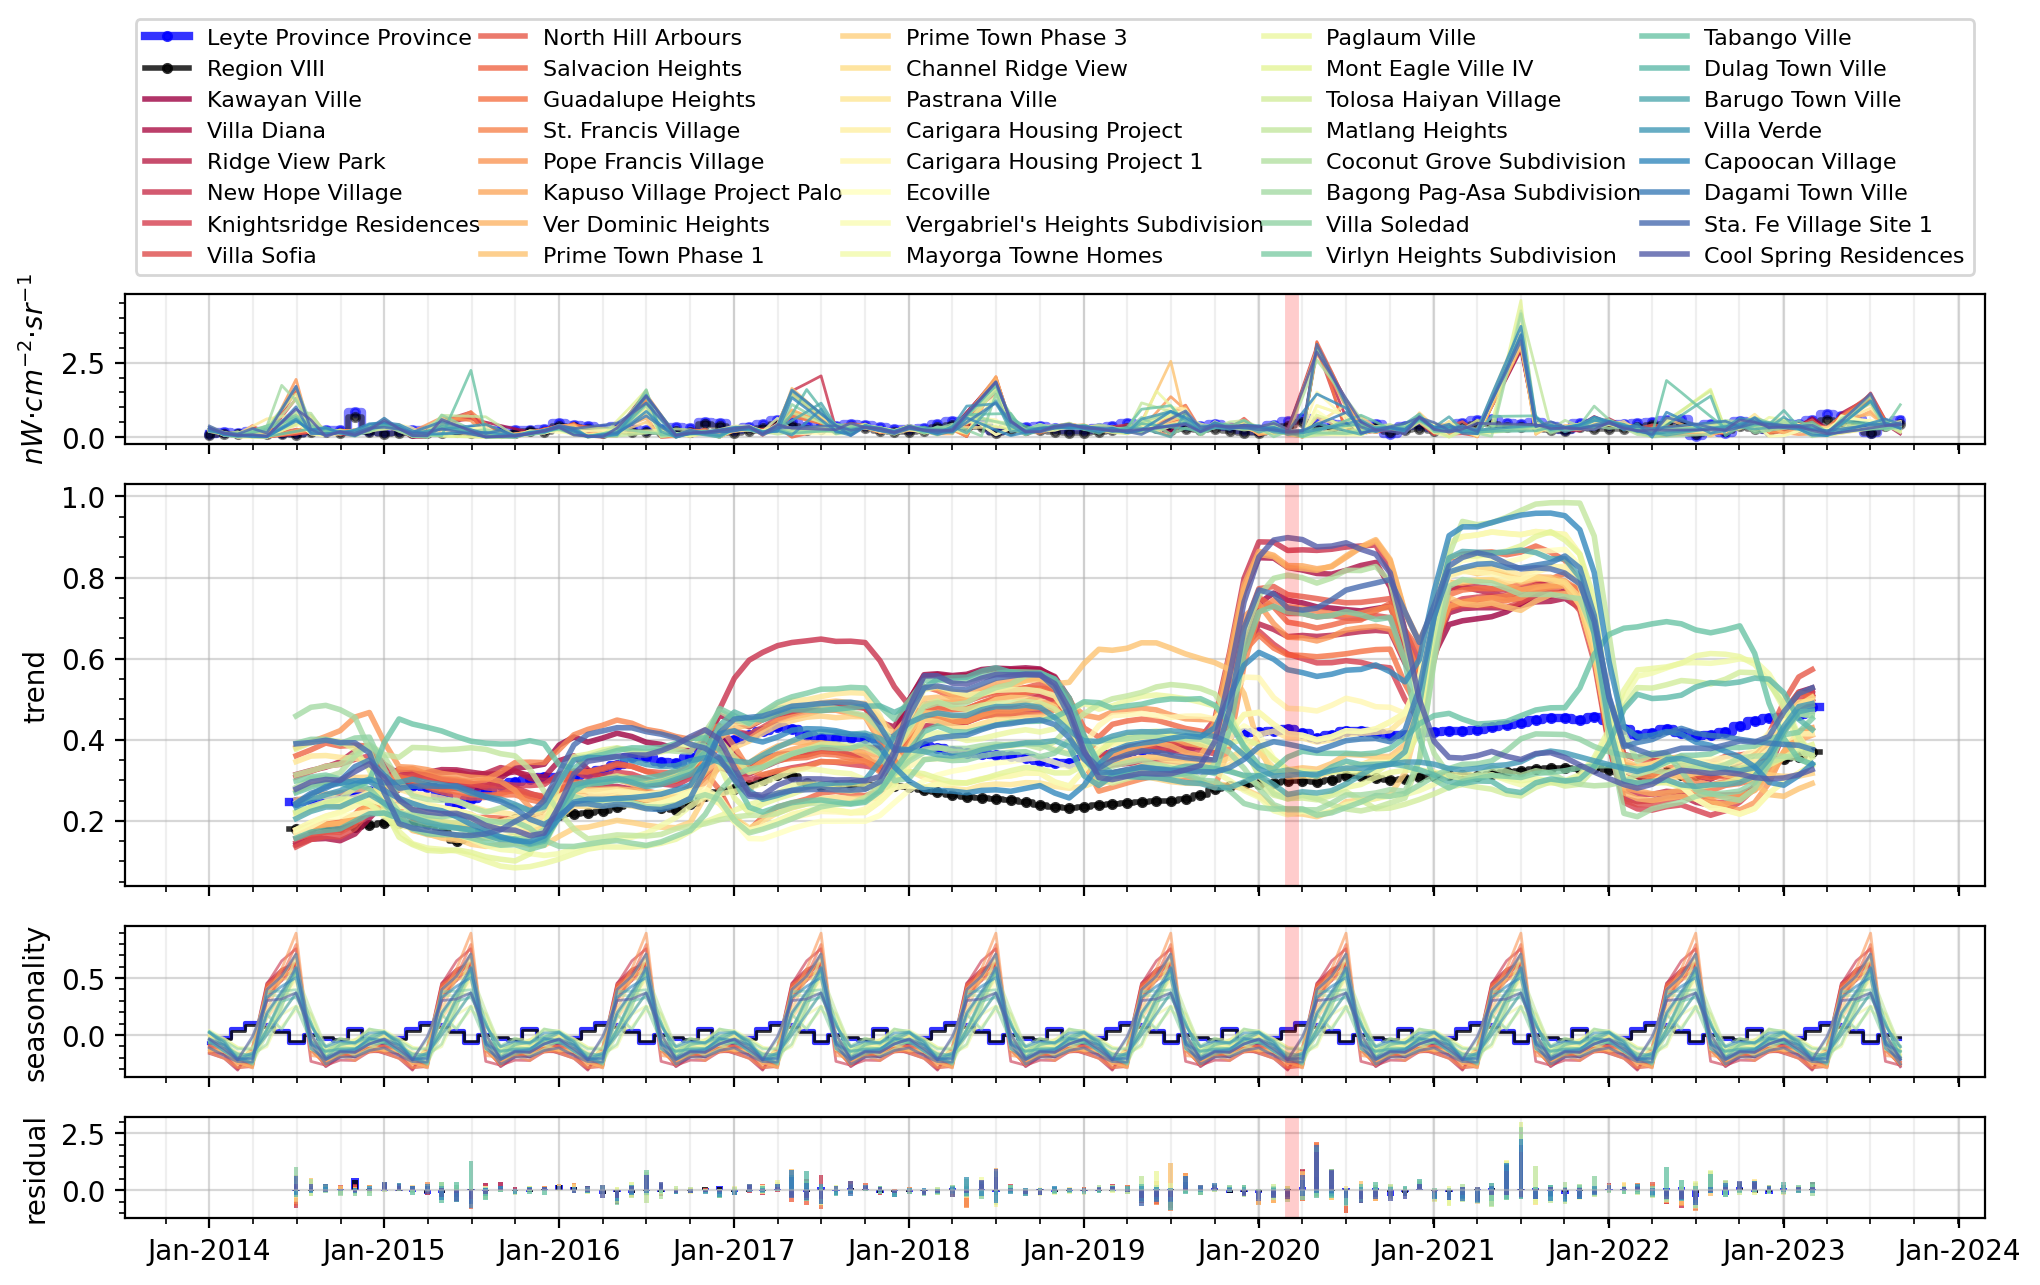

In [ ]:
data = dataframes[1]['Raw'].replace(0, np.nan)
data.interpolate(method='linear', inplace=True)
dataframe = STL_extraction(data, period = 12)
plot_STL(dataframe)

## Polynomial Interpolation

STL Decomposition: 100%|██████████| 40/40 [00:00<00:00, 744.18it/s]


Plotting timeseries NTL data


Processing: 100%|██████████| 38/38 [00:06<00:00,  5.93it/s]


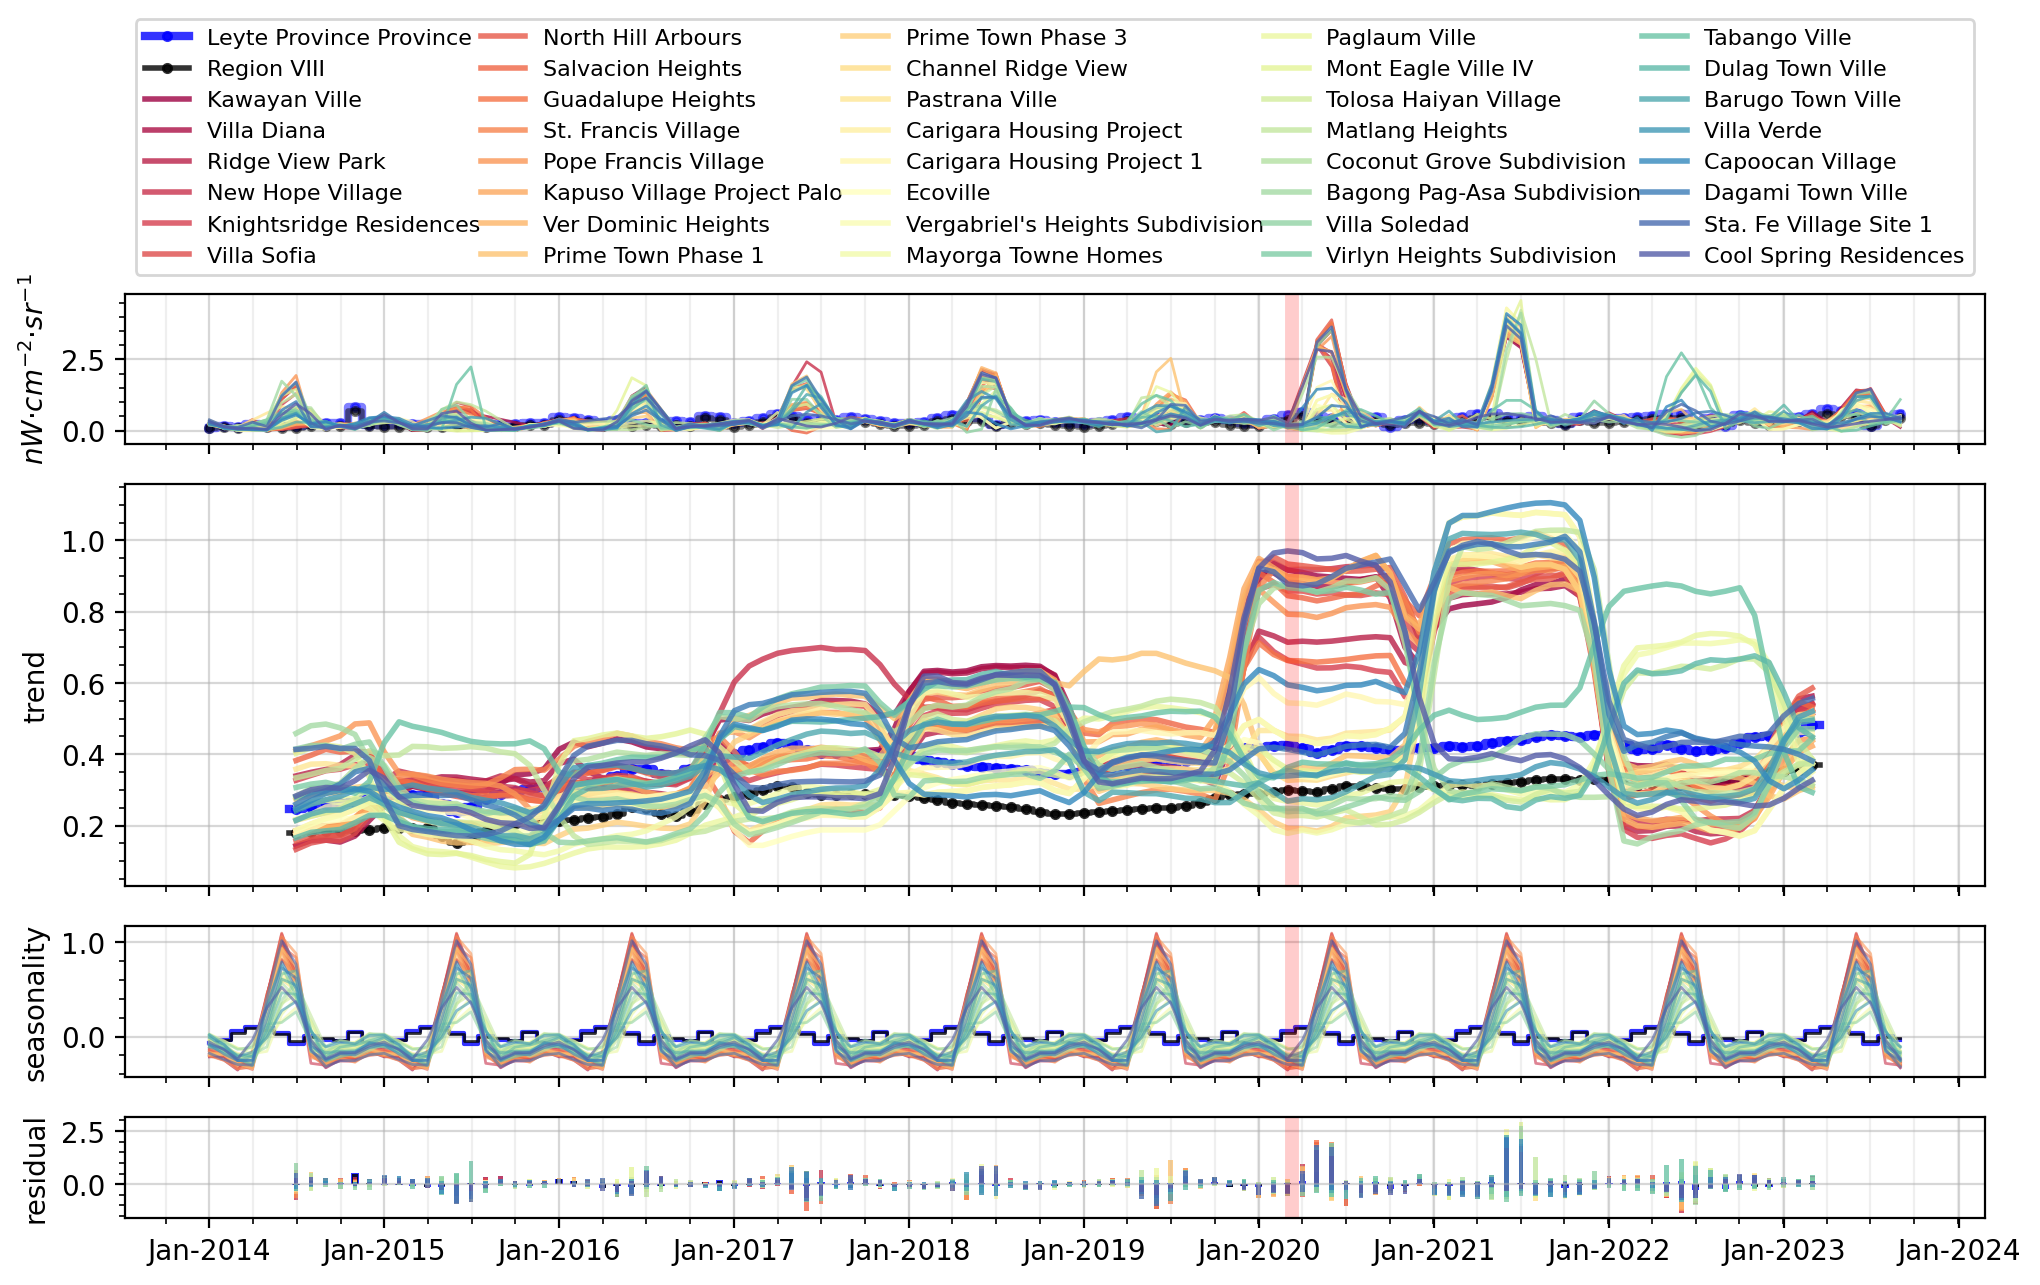

In [ ]:
data = dataframes[1]['Raw'].replace(0, np.nan)
data.interpolate(method='polynomial', order=2, inplace=True)
dataframe = STL_extraction(data, period = 12)
plot_STL(dataframe)

## Spline Interpolation

STL Decomposition: 100%|██████████| 40/40 [00:00<00:00, 691.04it/s]


Plotting timeseries NTL data


Processing: 100%|██████████| 38/38 [00:07<00:00,  5.36it/s]


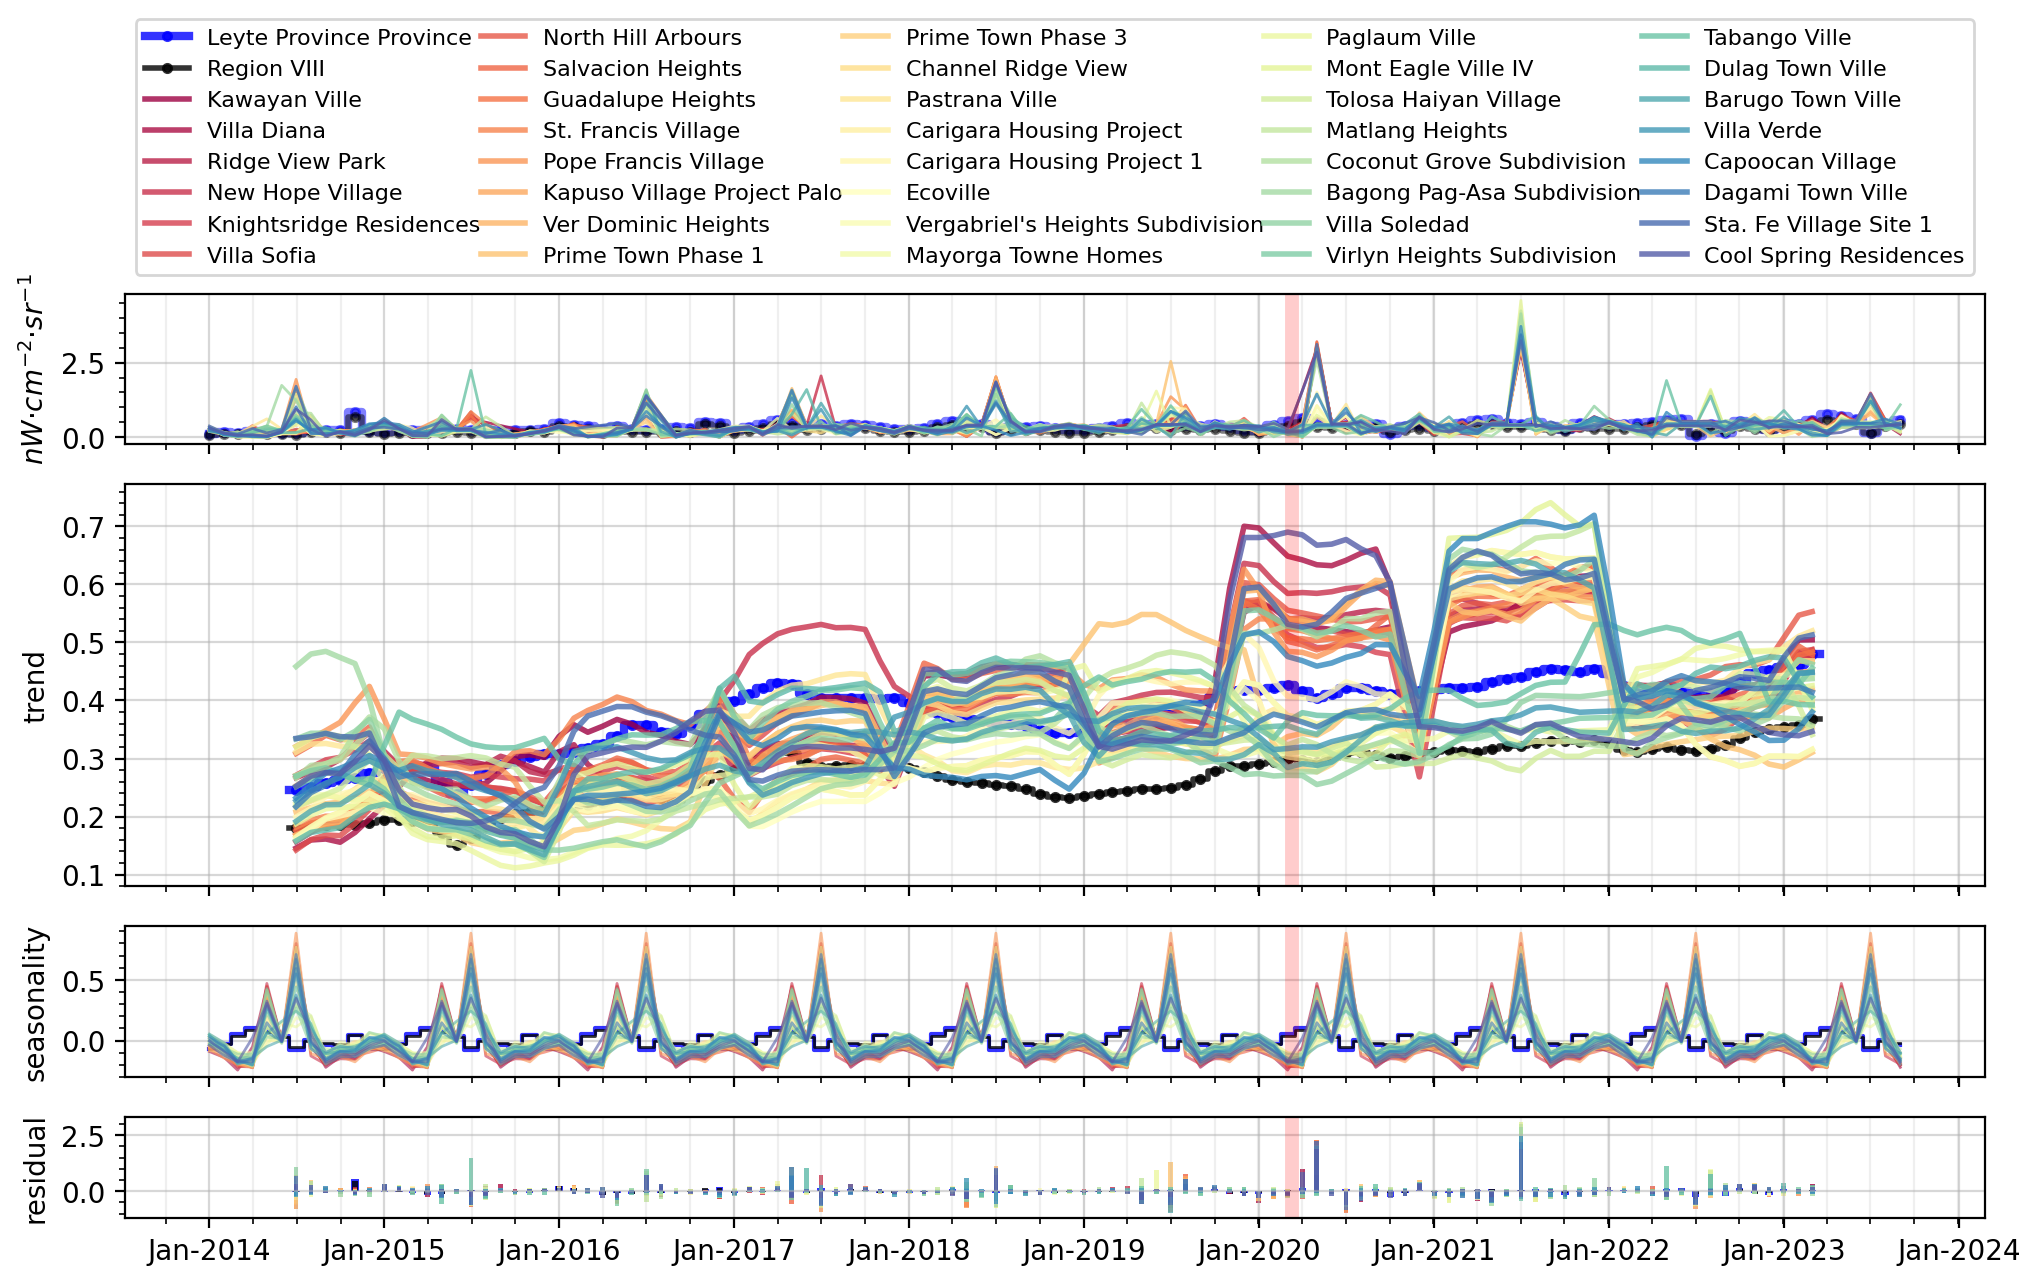

In [ ]:
data = dataframes[1]['Raw'].replace(0, np.nan)
data.interpolate(method='spline', order=2, inplace=True)
dataframe = STL_extraction(data, period = 12)
plot_STL(dataframe)

## Time-based Interpolation

STL Decomposition: 100%|██████████| 40/40 [00:00<00:00, 324.87it/s]


Plotting timeseries NTL data


Processing: 100%|██████████| 38/38 [00:07<00:00,  5.35it/s]


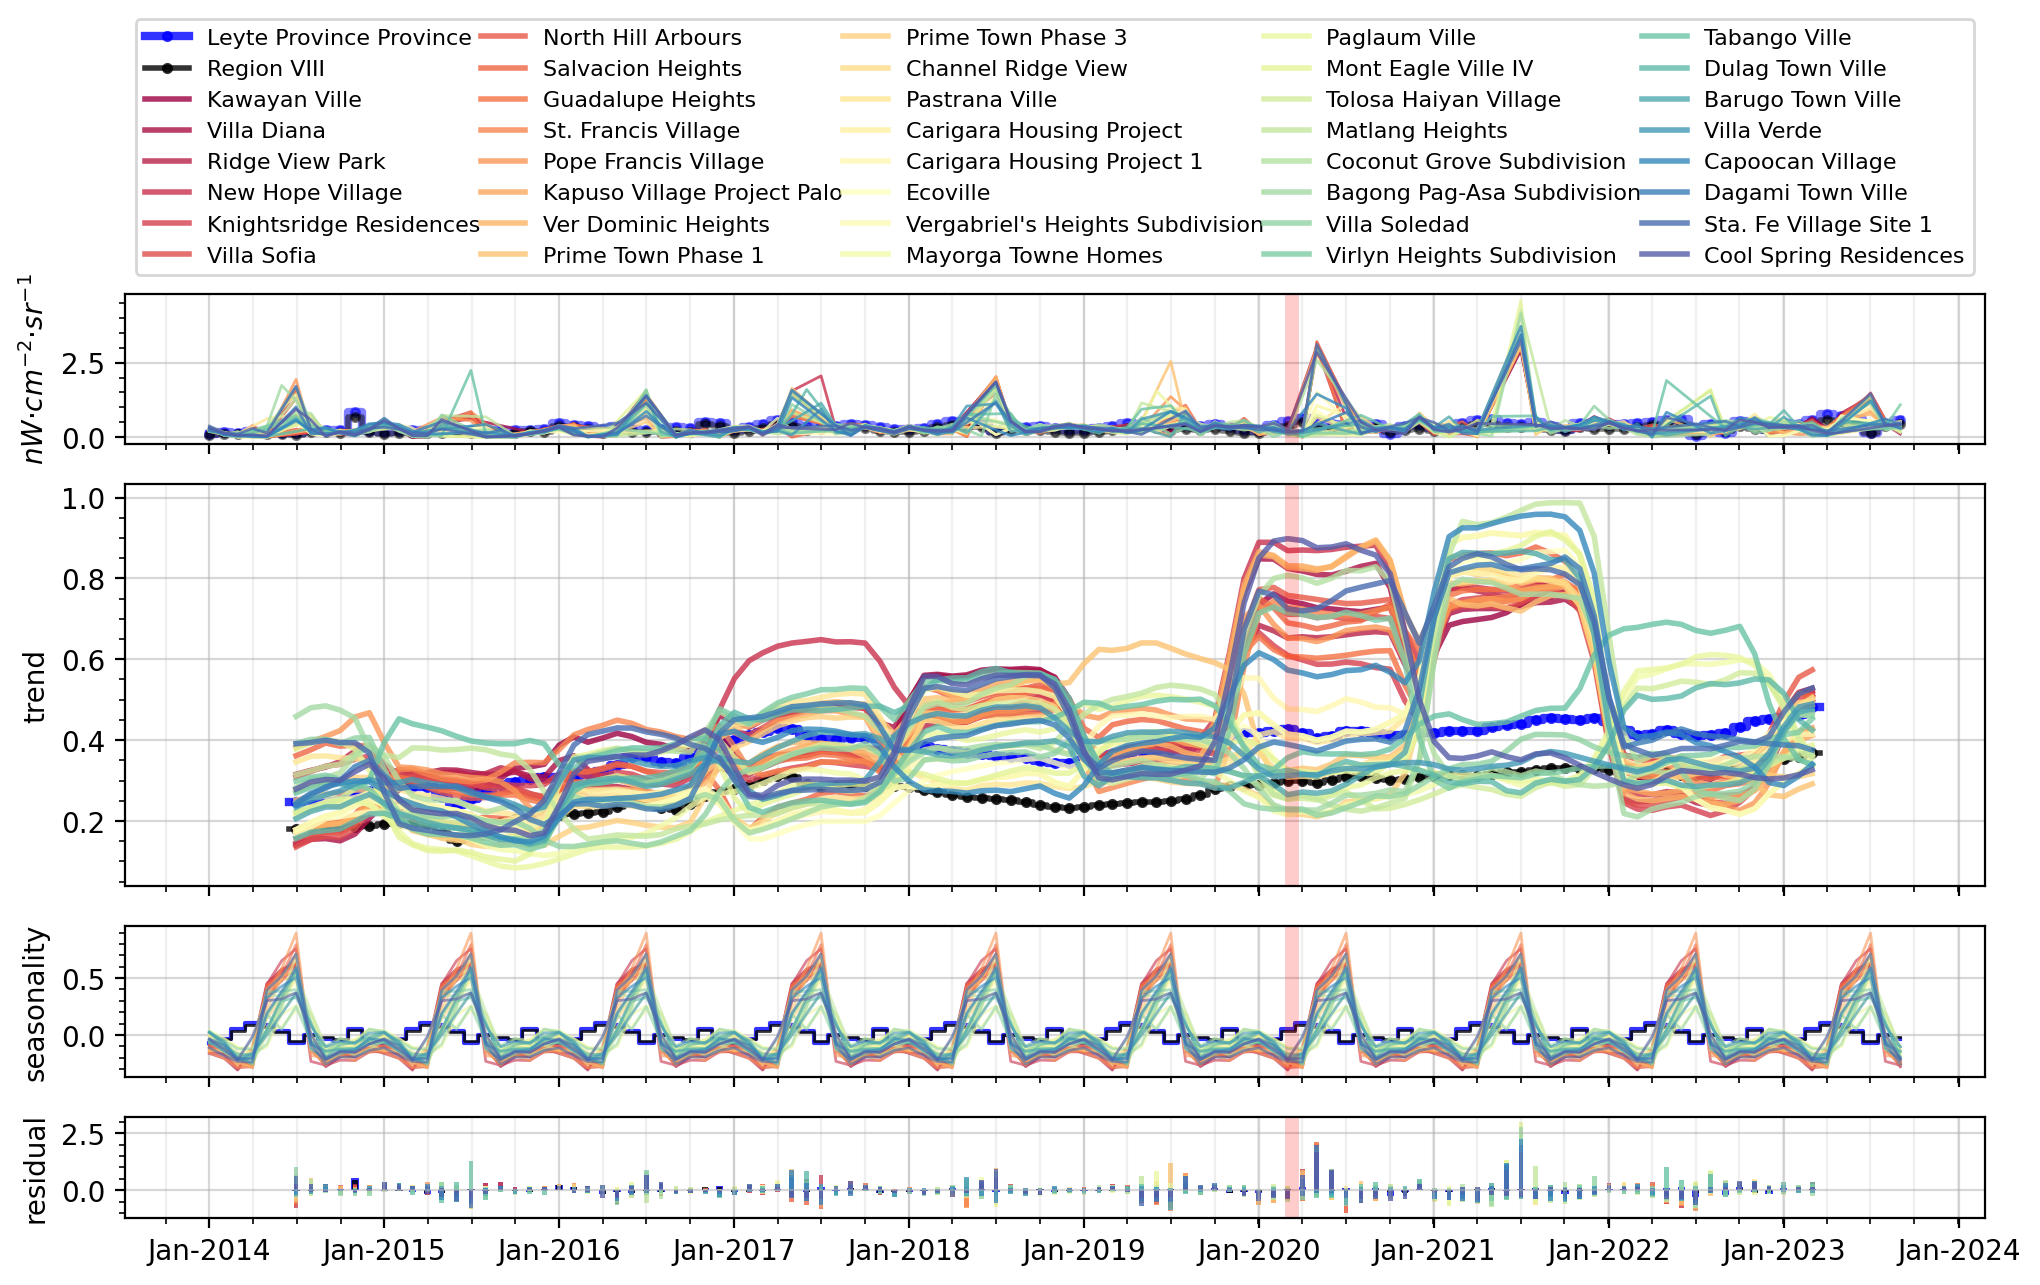

In [ ]:
data = dataframes[1]['Raw'].replace(0, np.nan)
data.interpolate(method='time', inplace=True)
dataframe = STL_extraction(data, period = 12)
plot_STL(dataframe)

## Nearest Neighbor

STL Decomposition: 100%|██████████| 40/40 [00:00<00:00, 211.99it/s]


Plotting timeseries NTL data


Processing: 100%|██████████| 38/38 [00:15<00:00,  2.43it/s]


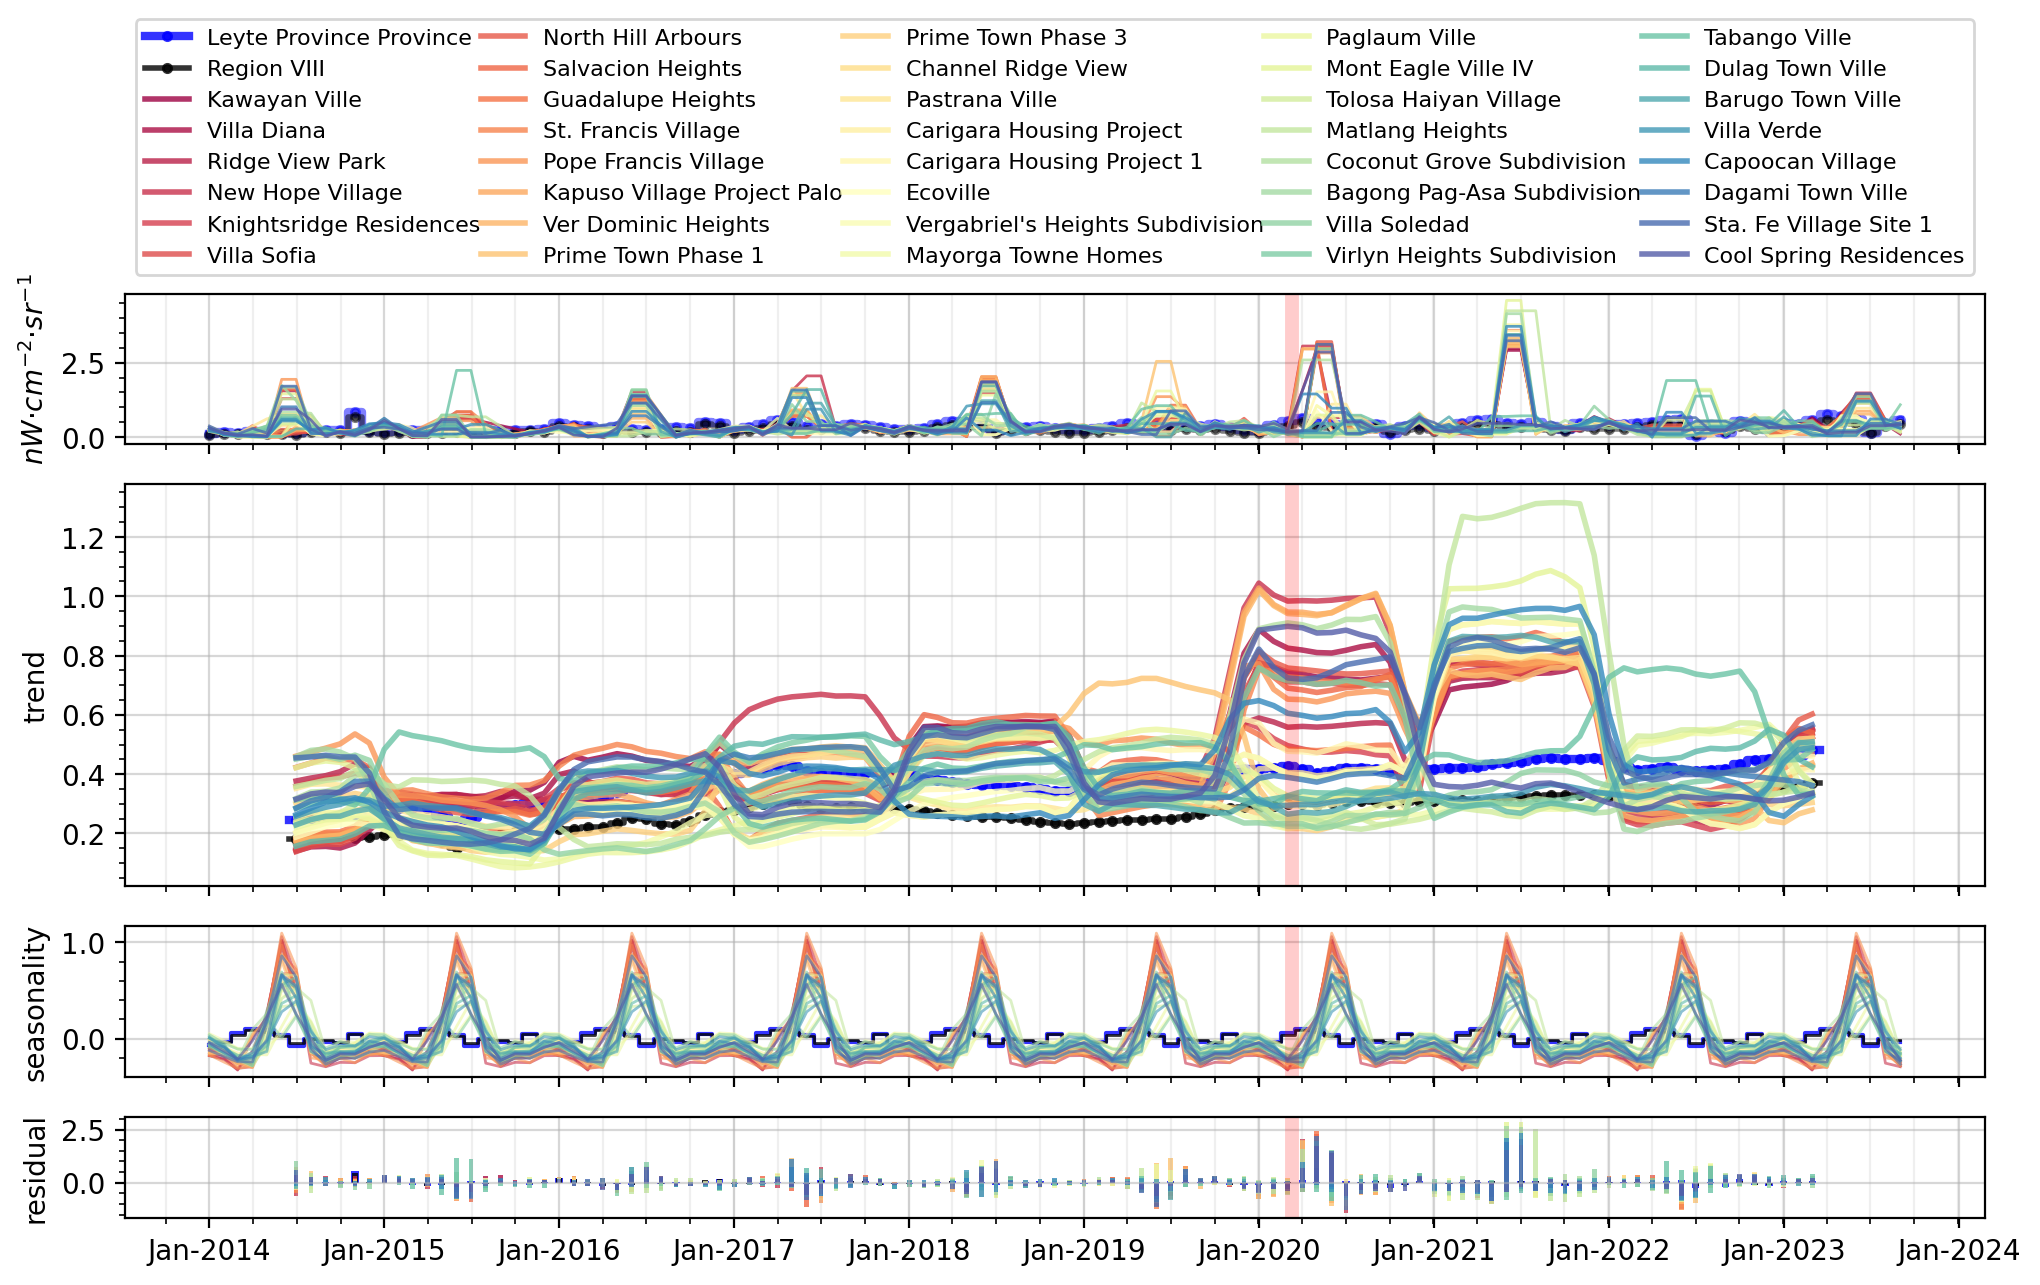

In [ ]:
data = dataframes[1]['Raw'].replace(0, np.nan)
data.interpolate(method='nearest', inplace=True)
dataframe = STL_extraction(data, period = 12)
plot_STL(dataframe)

# NTL Seasonality Analysis

In [ ]:
# plt.plot(dataframes[0]['Raw'].iloc[:, 2:])

<PolarAxes: >

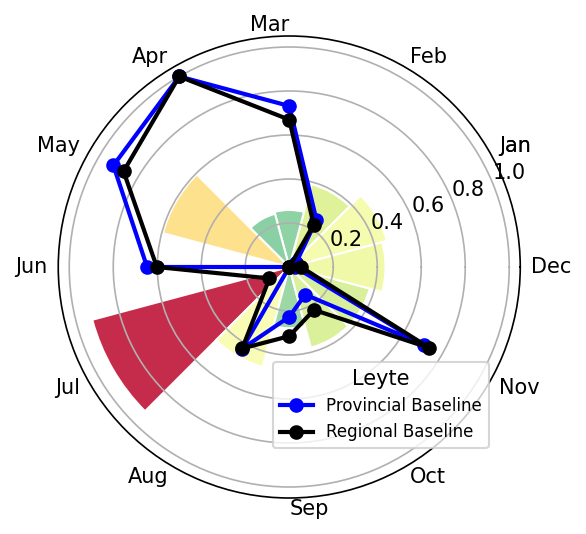

In [ ]:
# def get_df_name(df):
#     name =[x for x in globals() if globals()[x] is df][0]
#     return str(name[:-3])

def seasonal_circle(df, title):

    seasonal = df['Seasonality'][:13].rename(index=lambda x: x.strftime('%b'))
    normalized_seasonal=(seasonal-seasonal.min())/(seasonal.max()-seasonal.min())

    lowerLimit = 0
    pal = list(sns.color_palette(palette='hsv', n_colors=len(seasonal)).as_hex())

    plt.figure(figsize=(5,4), dpi = 150)
    ax = plt.subplot(111, polar=True)
    heights = normalized_seasonal[normalized_seasonal.columns[2:]].mean(axis=1)


    width = 2*np.pi / 12
    indexes = list(range(1, len(seasonal.index)+1))
    angles = [element * width for element in indexes]
    ax.plot(angles, normalized_seasonal.iloc[:, 0], 'bo-', label = 'Provincial Baseline', lw = 2)
    ax.plot(angles, normalized_seasonal.iloc[:, 1], 'ko-', label = 'Regional Baseline', lw = 2)
    # ax.plot(angles, heights, 'ks-', label = 'Resettlement Sites', lw = 3, alpha = 0.5)

    bars = ax.bar(x=angles, height=heights, width=width, bottom=lowerLimit,# label = 'Resettlement Sites',
                      linewidth=1, edgecolor="white", color=plt.cm.Spectral_r(heights)) #color = pal)#

    labelPadding = 0.1

    for bar, angle, height, label in zip(bars, angles, heights, seasonal.index):
            rotation = np.rad2deg(angle)
            alignment = ""

            if angle >= np.pi/2 and angle < 3*np.pi/2:
                alignment = "right"
                rotation = rotation + 180
            else:
                alignment = "left"

            ax.text(x=angle, y = 1.1,#y=lowerLimit + bar.get_height() + labelPadding,
                    s=label, ha=alignment, va='center') #rotation=rotation,
                    # rotation_mode="anchor")

            ax.set_thetagrids([], labels=[])
    ax.legend(fontsize = 8, title = title,  bbox_to_anchor= (0, 0.09, 0.95, 0.2), fancybox = True, loc = 4)
    plt.savefig(path + str(title) + "_seasonality.png")
    return ax

seasonal_circle(df, 'Leyte')

In [ ]:
# fig, ax = plt.subplots(5, 3, figsize = (15,6), dpi = 200)

for i in tqdm(range(len(dataframes))):
  seasonal_circle(dataframes[i], provincial_df[i])
  plt.show()

# plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9, hspace=0.5, wspace=0.5)
# plt.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

In [225]:
seasonal_max = pd.DataFrame(index = provincial_df,
                                columns = ['Provincial Baseline', 'Regional Baseline', 'Resettlement Sites'])
seasonal_min = seasonal_max.copy()

for i in tqdm(range(len(dataframes))):
    df = dataframes[i]
    province = provincial_df[i]
    seasonal = df['Seasonality'][:13].rename(index=lambda x: x.strftime('%b'))
    normalized_seasonal=(seasonal-seasonal.min())/(seasonal.max()-seasonal.min())
    summary_seasonality = normalized_seasonal.iloc[:,:2]
    sites = normalized_seasonal[normalized_seasonal.columns[2:]].mean(axis=1)
    summary_seasonality.insert(2, "Resettlement Sites", sites)
    # summary_seasonality

    seasonal_max.loc[province] = summary_seasonality.idxmax('index').values
    seasonal_min.loc[province] = summary_seasonality.idxmin('index').values

seasonal_minmax = pd.concat([seasonal_max, seasonal_min], axis = 1,
                            keys = ['max', 'min'])

seasonal_minmax = seasonal_minmax.reindex(index_sort)
# seasonal_minmax
seasonal_minmax.to_csv(path + 'NTL_Seasonality_Summary.csv')

100%|██████████| 15/15 [00:00<00:00, 98.97it/s]


In [223]:
index_sort

Index(['Rizal', 'Bulacan', 'Laguna', 'Samar', 'Aklan', 'Antique', 'Leyte',
       'Lanao Del Norte', 'Biliran', 'Cebu', 'Misamis Oriental', 'Albay',
       'Davao Oriental'],
      dtype='object')

In [211]:
seasonal_max = pd.DataFrame(index = provincial_df,
                                columns = ['Provincial Baseline', 'Regional Baseline', 'Resettlement Sites'])
seasonal_min = seasonal_max.copy()

i = -1
df = dataframes[i]
province = provincial_df[i]
seasonal = df['Seasonality'][:13].rename(index=lambda x: x.strftime('%b'))
normalized_seasonal=(seasonal-seasonal.min())/(seasonal.max()-seasonal.min())
summary_seasonality = normalized_seasonal.iloc[:,:2]
sites = normalized_seasonal[normalized_seasonal.columns[2:]].mean(axis=1)
summary_seasonality.insert(2, "Resettlement Sites", sites)
# summary_seasonality

seasonal_max.loc[province] = summary_seasonality.idxmax('index').values
seasonal_min.loc[province] = summary_seasonality.idxmin('index').values

seasonal_minmax = pd.concat([seasonal_max, seasonal_min], axis = 1,
                            keys = ['max', 'min'])
seasonal_minmax

max                                       \
                  Provincial Baseline Regional Baseline Resettlement Sites   
Rizal                             NaN               NaN                NaN   
Leyte                             NaN               NaN                NaN   
Cebu                              NaN               NaN                NaN   
Samar                             NaN               NaN                NaN   
Biliran                           NaN               NaN                NaN   
Aklan                             NaN               NaN                NaN   
Antique                           NaN               NaN                NaN   
Misamis Oriental                  NaN               NaN                NaN   
Lanao Del Norte                   NaN               NaN                NaN   
Albay                             NaN               NaN                NaN   
Laguna                            NaN               NaN                NaN   
Davao Oriental                    NaN               NaN                NaN   
Bulacan                           NaN               NaN                NaN   
Iloilo                            NaN               NaN                NaN   
Negros Occidental                 Apr               Apr                NaN   

                                  min                                       
                  Provincial Baseline Regional Baseline Resettlement Sites  
Rizal                             NaN               NaN                NaN  
Leyte                             NaN               NaN                NaN  
Cebu                              NaN               NaN                NaN  
Samar                             NaN               NaN                NaN  
Biliran                           NaN               NaN                NaN  
Aklan                             NaN               NaN                NaN  
Antique                           NaN               NaN                NaN  
Misamis Oriental                  NaN               NaN                NaN  
Lanao Del Norte                   NaN               NaN                NaN  
Albay                             NaN               NaN                NaN  
Laguna                            NaN               NaN                NaN  
Davao Oriental                    NaN               NaN                NaN  
Bulacan                           NaN               NaN                NaN  
Iloilo                            NaN               NaN                NaN  
Negros Occidental                 Jul               Jul                NaN

In [213]:
normalized_seasonal

Negros Occidental Province  Region VI
date                                       
Jan                     0.394084   0.411188
Feb                     0.567445   0.576359
Mar                     0.895985   0.850504
Apr                     1.000000   1.000000
May                     0.858618   0.882458
Jun                     0.605758   0.630491
Jul                     0.000000   0.000000
Aug                     0.373169   0.346725
Sep                     0.268337   0.326151
Oct                     0.536137   0.467087
Nov                     0.925573   0.764360
Dec                     0.405368   0.407773
Jan                     0.394084   0.411188

In [ ]:
resettlement_stats = pd.concat(dataframes, ignore_index=False, axis = 1, keys = regions)
summary = resettlement_stats[:2].copy()
summary.loc[2] = resettlement_stats[2:].mean()
summary = summary.set_axis(['Provincial Baseline', 'Regional Baseline', 'Resettlement Sites'])
summary = summary.stack(level=1).T
summary

In [ ]:
# seasonal_max

In [ ]:
seasonal_circle(results_path + 'Leyte_df.csv')

TypeError: ignored

RuntimeError: ignored

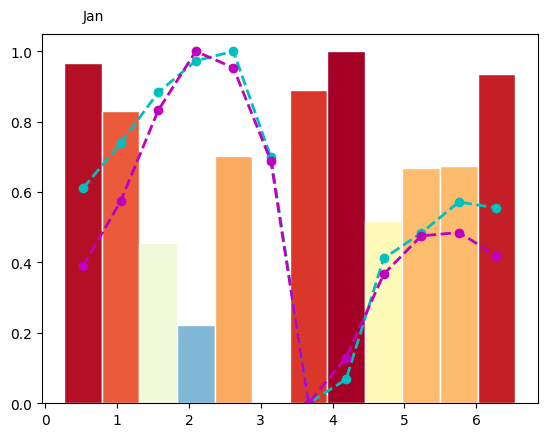

In [ ]:
# def get_df_name(df):
#     name =[x for x in globals() if globals()[x] is df][0]
#     return str(name[:-3])

def seasonal_circle(df, title):

    seasonal = df['Seasonality'][:12].rename(index=lambda x: x.strftime('%b'))
    normalized_seasonal=(seasonal-seasonal.min())/(seasonal.max()-seasonal.min())

    lowerLimit = 0
    pal = list(sns.color_palette(palette='hsv', n_colors=len(seasonal)).as_hex())

    # plt.figure(figsize=(5,4), dpi = 150)
    # ax = plt.subplot(111, polar=True)
    heights = normalized_seasonal[normalized_seasonal.columns[2:]].mean(axis=1)


    width = 2*np.pi / 12
    indexes = list(range(1, len(seasonal.index)+1))
    angles = [element * width for element in indexes]
    plt.plot(angles, normalized_seasonal.iloc[:, 0], 'co--', label = 'Provincial Baseline', lw = 2)
    plt.plot(angles, normalized_seasonal.iloc[:, 1], 'mo--', label = 'Regional Baseline', lw = 2)
    # ax.plot(angles, heights, 'ks-', label = 'Resettlement Sites', lw = 3, alpha = 0.5)

    bars = plt.bar(x=angles, height=heights, width=width, bottom=lowerLimit, label = 'Resettlement Sites',
                      linewidth=1, edgecolor="white", color=plt.cm.RdYlBu_r(heights)) #color = pal)#

    labelPadding = 0.1

    for bar, angle, height, label in zip(bars, angles, heights, seasonal.index):
            rotation = np.rad2deg(angle)
            alignment = ""

            if angle >= np.pi/2 and angle < 3*np.pi/2:
                alignment = "right"
                rotation = rotation + 180
            else:
                alignment = "left"

            plt.text(x=angle, y = 1.1,#y=lowerLimit + bar.get_height() + labelPadding,
                    s=label, ha=alignment, va='center') #rotation=rotation,
                    # rotation_mode="anchor")

            plt.thetagrids([], labels=[])
    plt.legend(fontsize = 8, title = title,  bbox_to_anchor= (0, 0.09, 0.95, 0.2), fancybox = True)
    # return ax


seasonal_circle(df, 'Leyte')

100%|██████████| 13/13 [00:02<00:00,  5.30it/s]


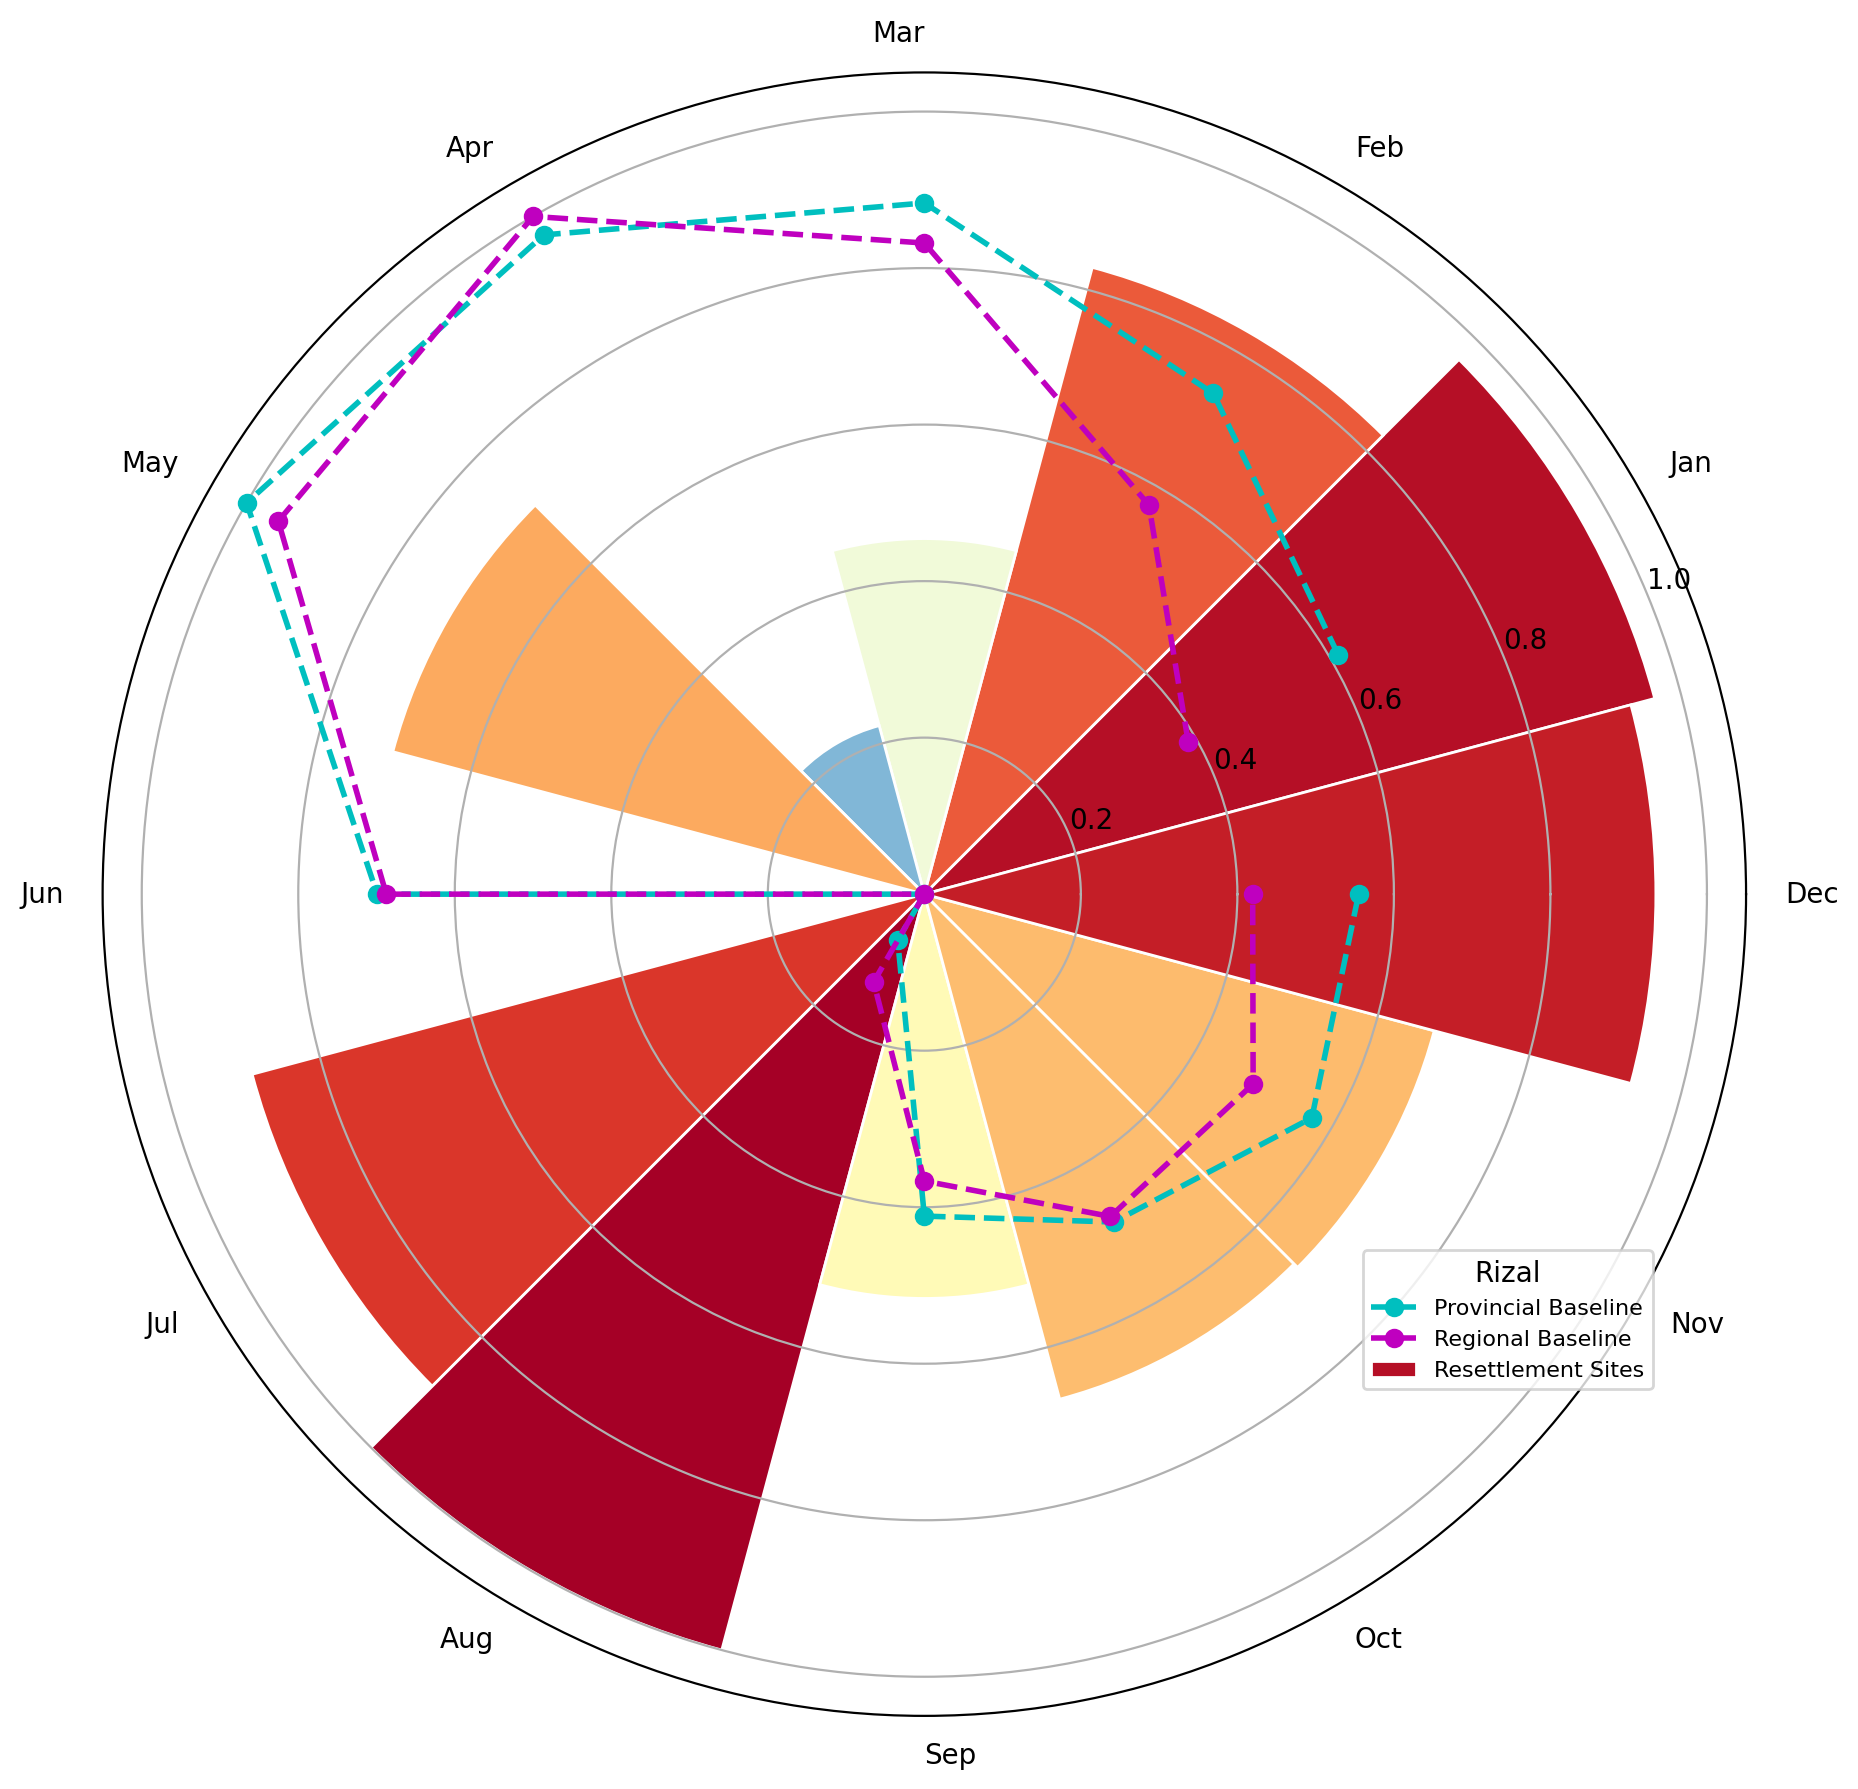

In [ ]:
plt.figure(dpi = 200, figsize = (15,9))
for i in tqdm(range(len(dataframes))):
  plt.subplot(5,3,i+1)
  seasonal_circle(dataframes[i], provincial_df[i])

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9, hspace=0.5, wspace=0.5)
plt.tight_layout()

<PolarAxes: >

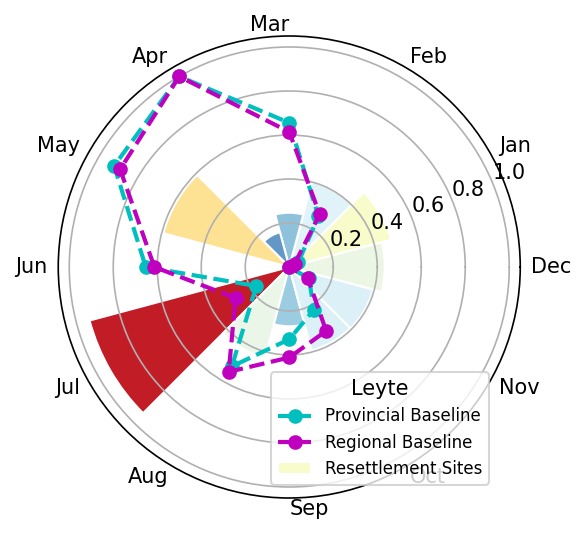

In [ ]:
seasonal_circle(dataframes[0], provincial_df[0])

In [ ]:
#defining my worksheet
worksheet = gc.open('List of Housing Projects').sheet1
rows = worksheet.get_all_values()

#Convert to a DataFrame
df = pd.DataFrame(rows)
#creating columns name
df.columns = df.iloc[0]
df = df.iloc[1:]
#convert 'strings' to 'float'
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df['Buffer'] = pd.to_numeric(df['Buffer'], errors='coerce')

# df['Latitude'] = df['Latitude'].fillna(0).astype(float)
# df['Longitude'] = df['Longitude'].fillna(0).astype(float)
# df['Buffer'] = df['Buffer'].fillna(0).astype(float)
df